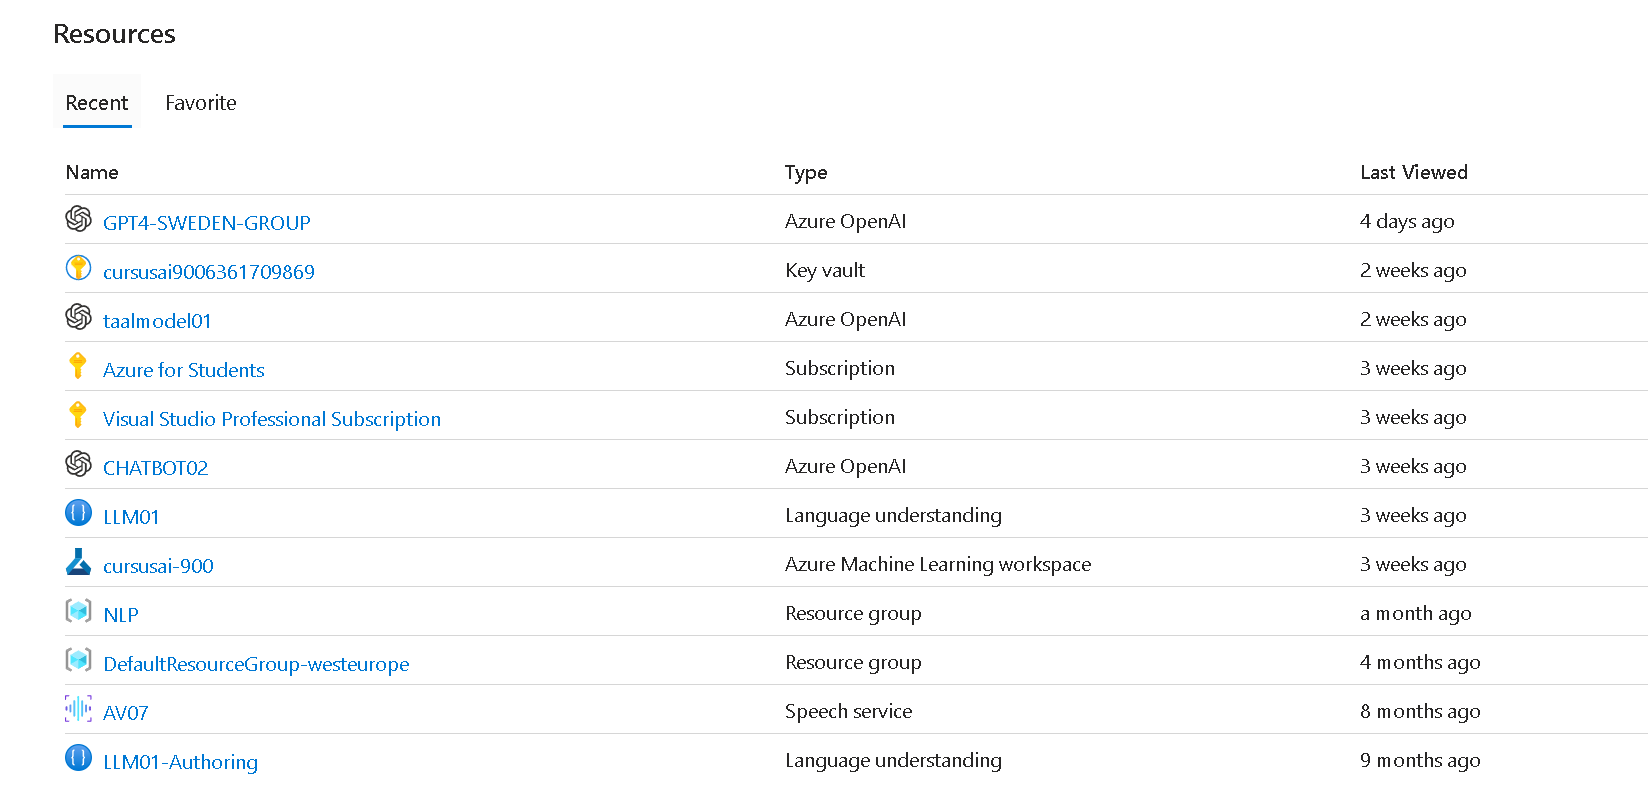


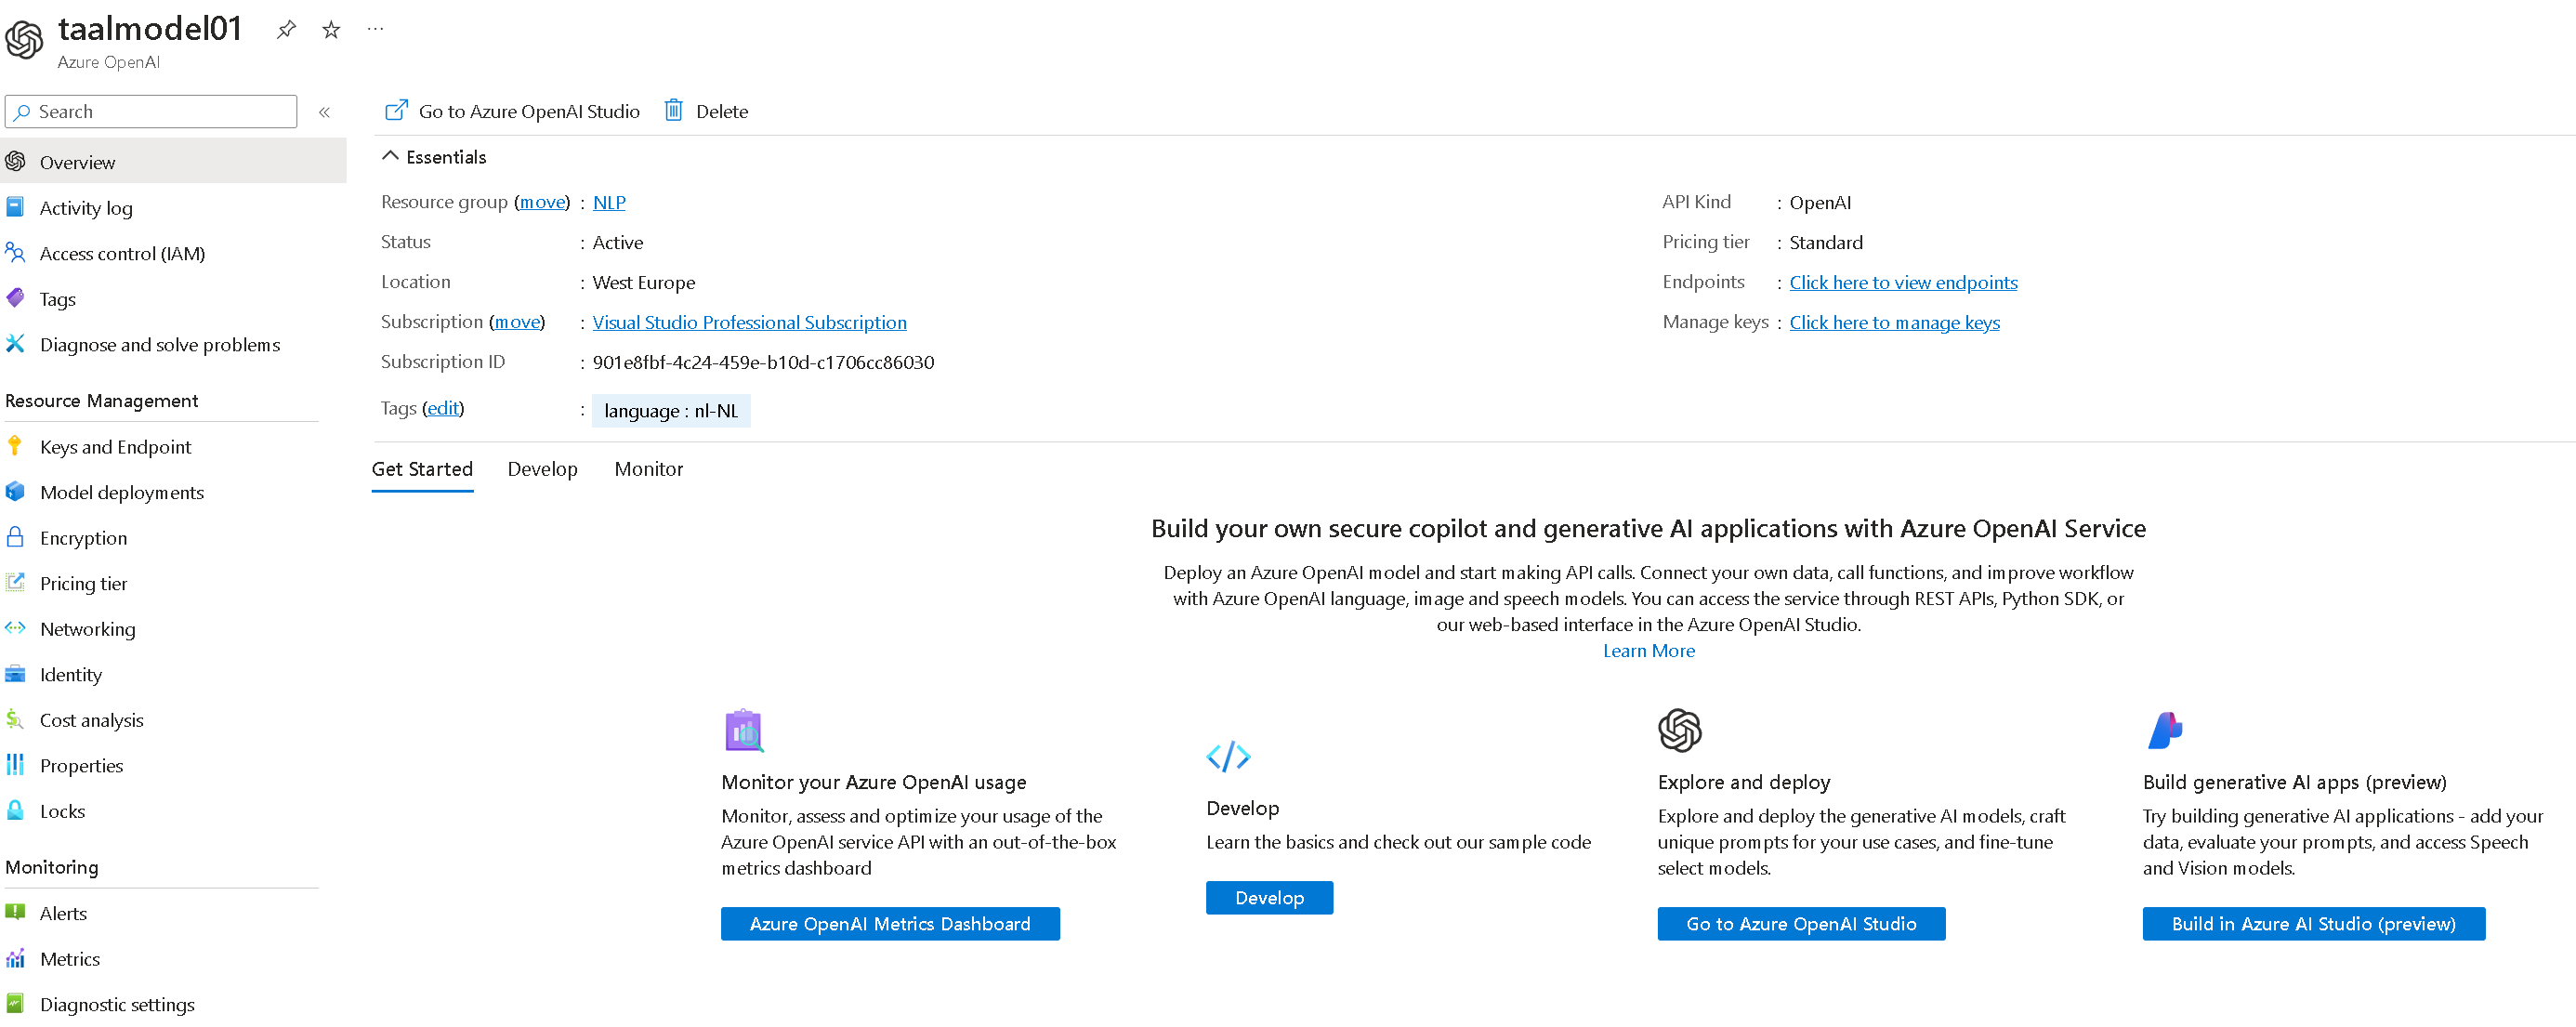

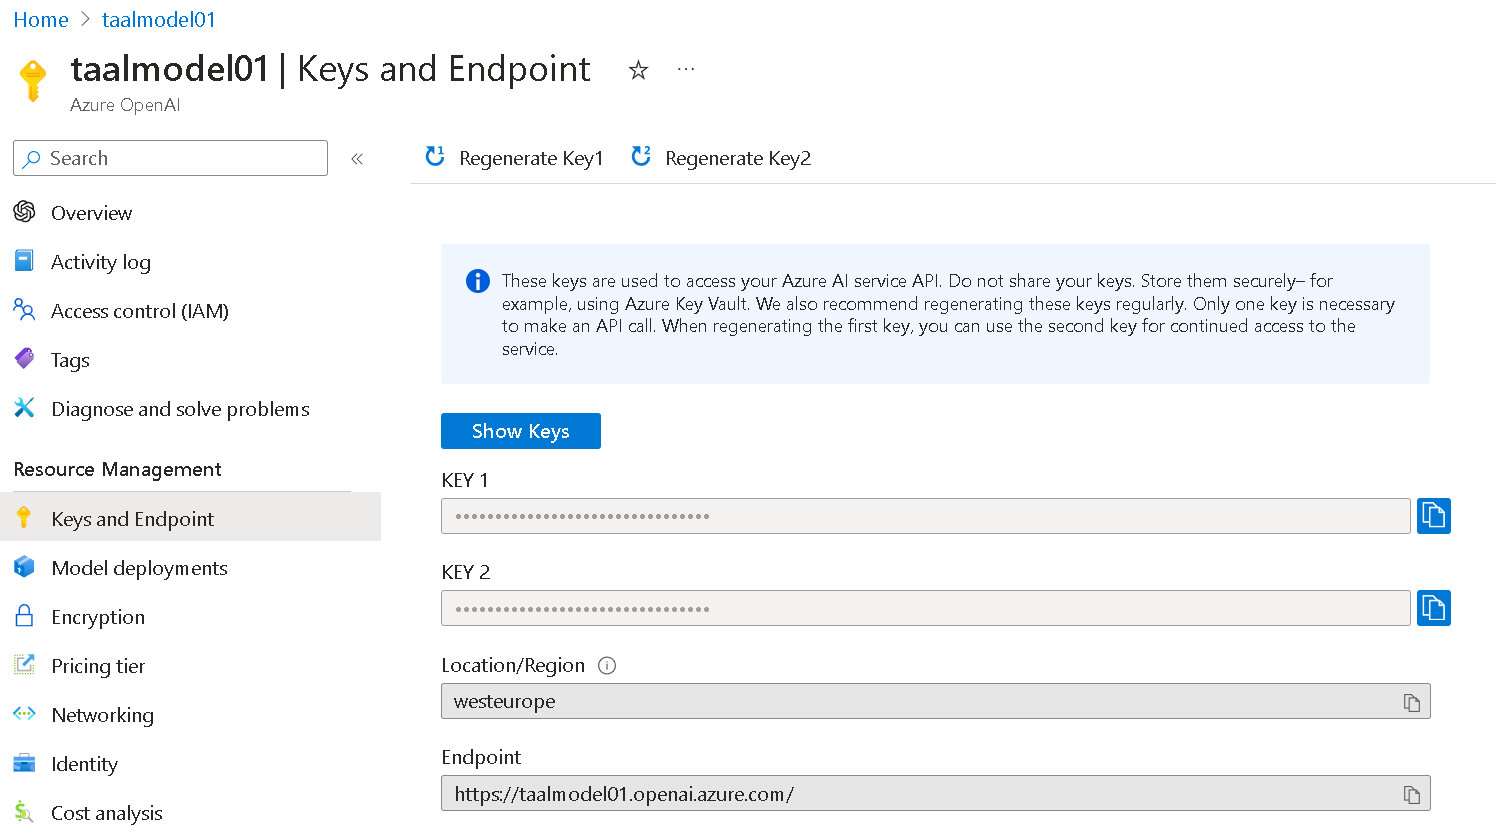

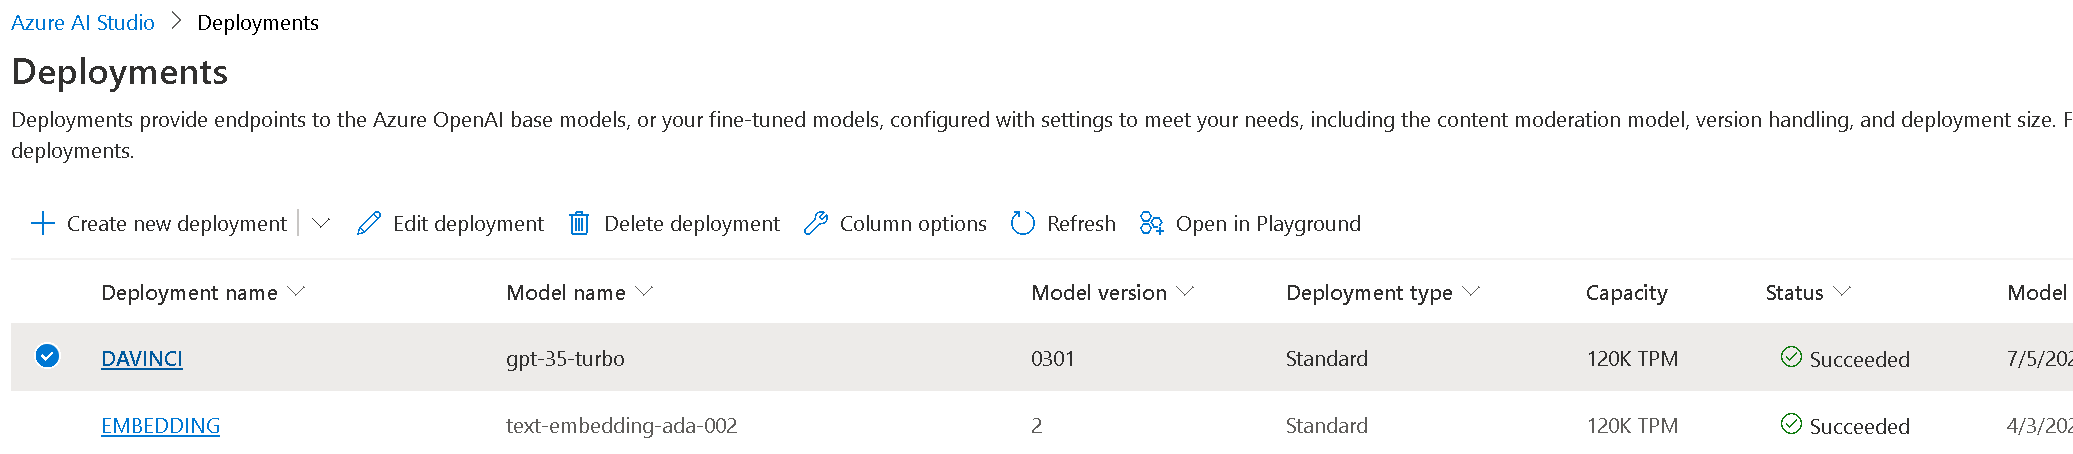

xx

In [1]:
### USE langchain-env
### ONLY WORKS with gpt-35-turbo-instruct + ada-002
## https://learn.microsoft.com/en-us/azure/ai-services/openai/overview


import os
from dotenv import load_dotenv

from langchain.llms import AzureOpenAI

from langchain.document_loaders import UnstructuredFileLoader, PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter

## ====>https://github.com/kimtth/awesome-azure-openai-llm

from langchain.embeddings import AzureOpenAIEmbeddings
from langchain.vectorstores import Chroma, FAISS

from langchain.chains import RetrievalQA
from langchain.llms import AzureOpenAI


In [3]:
import os

from dotenv import load_dotenv
load_dotenv()

True

In [4]:
import os
# Download documents to local directory (here called LAWTON)
os.makedirs("LAWTON", exist_ok=True)

In [5]:
# load all PDFs that are stored in the local-direcory
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import PyPDFDirectoryLoader
loader = PyPDFDirectoryLoader("./LAWTON/")

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

docs_before_split = loader.load()
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 900,
    chunk_overlap  = 50,
)
docs_after_split = text_splitter.split_documents(docs_before_split)

docs_after_split[0]

Document(page_content='Original Research Article\nDement Geriatr Cogn Disord 2004;18:159–164\nDOI: 10.1159/000079196\nA Model for Quality of Life Measures in\nPatients with Dementia:Lawton’s Next Step\nC. Jonkera,bD.L. GerritsenbP.R. BosboomcJ.T. Van der Steenb\naDepartment of Psychiatry and bInstitute for Research in Extramural Medicine, VU University Medical Center, and\ncDepartment of Clinical Neuropsychology, VU University, Amsterdam, The NetherlandsAccepted: January 22, 2004\nPublished online: June 21, 2004\nProf. Dr. C. Jonker, Behavioral NeurologistDepartment of Psychiatry and EMGO InstituteVU University Medical Center, Van der Boechorststraat 7NL–1081 BT Amsterdam (The Netherlands)Tel. +31 20 4446770, Fax +31 20 4446775, E-Mail c.jonker.emgo@med.vu.nl ABC\nFax + 41 61 306 12 34E-Mail karger@karger.chwww.karger.com© 2004 S. Karger AG, Basel\n1420–8008/04/0182–0159$21.00/0\nAccessible online at:', metadata={'source': 'LAWTON\\QoL reference Lawton.pdf', 'page': 0})

In [8]:
#Use Langchain to create the embeddings using text-embedding-ada-002

embeddings = AzureOpenAIEmbeddings(
    azure_deployment    = os.getenv("DEPLOYMENT_NAME"),
    openai_api_version  = os.getenv("OPENAI_API_VERSION"),
   )


db = FAISS.from_documents(documents=docs_after_split, embedding=embeddings)

In [9]:
model_name = os.getenv("ENGINE_NAME")

# display(embeddings)
chain = RetrievalQA.from_chain_type(llm=AzureOpenAI(model_kwargs={'engine': model_name}),chain_type='stuff', retriever = db.as_retriever())

c:\Users\PROMET02\anaconda3\envs\langchain-gpu-env\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.AzureOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import AzureOpenAI`.
  warn_deprecated(


In [10]:
#query = 'Show the first 3 sentences of the document'
query = """What are the factual page numbers (as shown in the PDF version of the paper titled:  A Model for Quality of Life Measures in Patients with Dementia:Lawton’s Next Step.)
            of the pages that contain the abstract, introduction, methodology, results and conclusion."""
chain.run(query)

c:\Users\PROMET02\anaconda3\envs\langchain-gpu-env\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


' The abstract is on page 159, the introduction is on page 160, the methodology is on page 161, the results are on page 162, and the conclusion is on page 163.'

In [11]:
from langchain.prompts import PromptTemplate

prompt_template = """Use the following pieces of context to answer the question at the end. Please follow the following rules:
1. If you don't know the answer, don't try to make up an answer. Just say "I can't find the final answer but you may want to check the following links".
2. If you find the answer, write the answer in a concise way with five sentences maximum.

{context}

Question: {question}

Helpful Answer:
"""

PROMPT = PromptTemplate(
 template=prompt_template, input_variables=["context", "question"]
)

In [20]:
#query = """Give a 500 word summary of the paper titled:  A Model for Quality of Life Measures in Patients with Dementia:Lawton’s Next Step. Start with stating the authors en journal + the abstract and then summarize the introduction, methodology, results and conclusion."""  
query = """What are the factual page numbers (as shown in the PDF version of the paper titled:  A Model for Quality of Life Measures in Patients with Dementia:Lawton’s Next Step.)
            of the pages that contain the abstract, introduction, methodology, results and conclusion."""
          # that contain the abstract, introduction, methodology, results and conclusion. Make a list of two columns with the page numbers and the corresponding text. """
          # Next, provide a 250 word summary of the abstract and then summarize the introduction, methodology, results and conclusion."""  
         # Sample question, change to other questions you are interested in.


relevant_documents = db.similarity_search(query)
print(f'There are {len(relevant_documents)} documents retrieved which are relevant to the query. Display the first one:\n')
print(relevant_documents[0].page_content)

There are 4 documents retrieved which are relevant to the query. Display the first one:

Original Research Article
Dement Geriatr Cogn Disord 2004;18:159–164
DOI: 10.1159/000079196
A Model for Quality of Life Measures in
Patients with Dementia:Lawton’s Next Step
C. Jonkera,bD.L. GerritsenbP.R. BosboomcJ.T. Van der Steenb
aDepartment of Psychiatry and bInstitute for Research in Extramural Medicine, VU University Medical Center, and
cDepartment of Clinical Neuropsychology, VU University, Amsterdam, The NetherlandsAccepted: January 22, 2004
Published online: June 21, 2004
Prof. Dr. C. Jonker, Behavioral NeurologistDepartment of Psychiatry and EMGO InstituteVU University Medical Center, Van der Boechorststraat 7NL–1081 BT Amsterdam (The Netherlands)Tel. +31 20 4446770, Fax +31 20 4446775, E-Mail c.jonker.emgo@med.vu.nl ABC
Fax + 41 61 306 12 34E-Mail karger@karger.chwww.karger.com© 2004 S. Karger AG, Basel
1420–8008/04/0182–0159$21.00/0
Accessible online at:


In [21]:
# display(embeddings)
retrievalQA = RetrievalQA.from_chain_type(
    llm=AzureOpenAI(model_kwargs={'engine': model_name}),
    chain_type='stuff', 
    retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 10}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": PROMPT}
    )



In [22]:
# Call the QA chain with our query.
result = retrievalQA.invoke({"query": query})
print(result['result'])


The abstract can be found on page 159, the introduction on pages 159-161, the methodology on pages 161-163, the results on pages 163-164, and the conclusion on page 164. 

